### Polynomial regression is a supervised machine learning algorithm used when the relationship between the independent variable (input) and the dependent variable (output) is non-linear. Unlike simple linear regression, which models the relationship as a straight line, polynomial regression allows for more flexibility by fitting a polynomial equation to the data.
### equation --> y = bo + b1(x1)**1......+bn(x1)**n

In [122]:
# import libraries

# for data 
import pandas as pd
import numpy as np

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for train and test split
from sklearn.model_selection import train_test_split

# for model
from sklearn.linear_model import LinearRegression

# to convert in polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [123]:
# read the data
d_set=pd.read_csv('salary.csv')
d_set

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


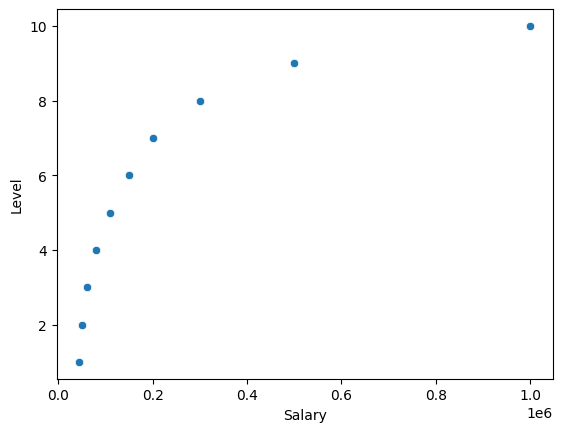

In [124]:
# graphical visualisation
sns.scatterplot(x=d_set['Salary'], y=d_set['Level'], data=d_set)
plt.show()

### Result: since from the graph it is clearly seen that the line is curve and therefore shows the polynomial effect between these two columns 

In [125]:
# separating input and output columns
X=d_set[['Level']]
y=d_set['Salary']

In [126]:
# check the correlation
d_set.corr()

C:\Users\mmm\AppData\Local\Temp\ipykernel_3484\754788580.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d_set.corr()


,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


### result: from above result it is clear that the salary and level columns are highly correlated and hence we need to convert input feature into polynomial nature

In [127]:
# converting the input feature into polynomials
poly=PolynomialFeatures(degree=2)

# now fit the input feature
poly.fit(X)

# now transform the data and make it input feature
X=poly.transform(X)

In [128]:
# train test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1)

In [129]:
# now model training
lr=LinearRegression()

# fit the training data
lr.fit(X_train, y_train)

LinearRegression()

In [130]:
X

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [131]:
# check the predited value
test=poly.transform([[4]])

lr.predict(test)

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([7954.54545454])

In [132]:
# predict the sample values
y_pred=lr.predict(X)

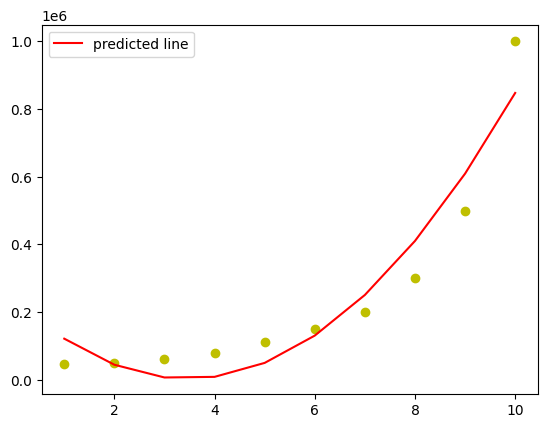

In [133]:
# visualise the predicted line on the graph
plt.scatter(d_set['Level'], d_set['Salary'], color='y')
plt.plot(d_set['Level'], y_pred, color='r', label='predicted line')
plt.legend()
plt.show()